In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data={
    "satisfaction":np.random.choice(['satisfies', 'unsatisfied'], size=1000),
    "gender":np.random.choice(['male', 'female'], size=1000),
    "class":np.random.choice(['eco', 'business','eco_plus'], size=1000),
    "customer":np.random.choice(['loyal', 'disloyal'], size=1000),
    "age":np.random.randint(10,80, size=1000),
    "wifi":np.random.randint(0,6, size=1000)
}
df=pd.DataFrame(data)
df.head()

,satisfaction,gender,class,customer,age,wifi
0,satisfies,female,business,disloyal,36,1
1,satisfies,male,eco_plus,disloyal,45,0
2,unsatisfied,female,business,loyal,12,5
3,satisfies,female,business,loyal,69,5
4,unsatisfied,male,eco_plus,loyal,78,5


In [24]:
df.info

<bound method DataFrame.info of     satisfaction  gender     class  customer  age  wifi
0      satisfies  female  business  disloyal   36     1
1      satisfies    male  eco_plus  disloyal   45     0
2    unsatisfied  female  business     loyal   12     5
3      satisfies  female  business     loyal   69     5
4    unsatisfied    male  eco_plus     loyal   78     5
..           ...     ...       ...       ...  ...   ...
995    satisfies  female  business  disloyal   31     1
996    satisfies    male  eco_plus  disloyal   64     1
997  unsatisfied    male  eco_plus  disloyal   64     2
998  unsatisfied    male  eco_plus     loyal   39     2
999  unsatisfied    male  business  disloyal   54     1

[1000 rows x 6 columns]>

In [25]:
df.describe()

,age,wifi
count,1000.000000,1000.000000
mean,43.921000,2.497000
std,19.934848,1.707896
min,10.000000,0.000000
25%,27.000000,1.000000
50%,44.000000,3.000000
75%,60.000000,4.000000
max,79.000000,5.000000


In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1000.0,43.921,19.934848,10.0,27.0,44.0,60.0,79.0
wifi,1000.0,2.497,1.707896,0.0,1.0,3.0,4.0,5.0


In [27]:
df.isnull().sum()

satisfaction    0
gender          0
class           0
customer        0
age             0
wifi            0
dtype: int64

<Axes: >

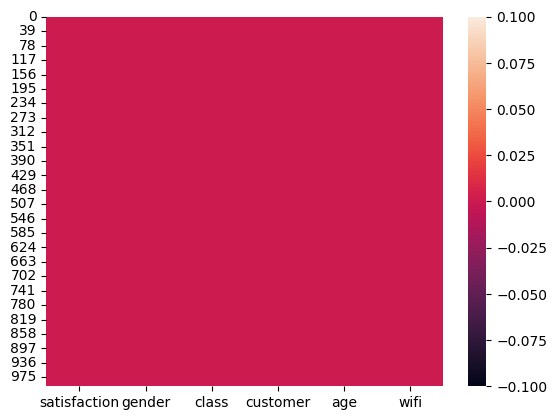

In [28]:
sns.heatmap(df.isnull())

<Axes: >

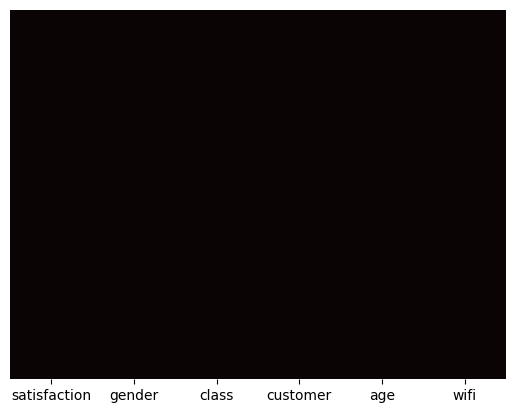

In [29]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False ,cmap='mako')

<Axes: xlabel='satisfaction', ylabel='count'>

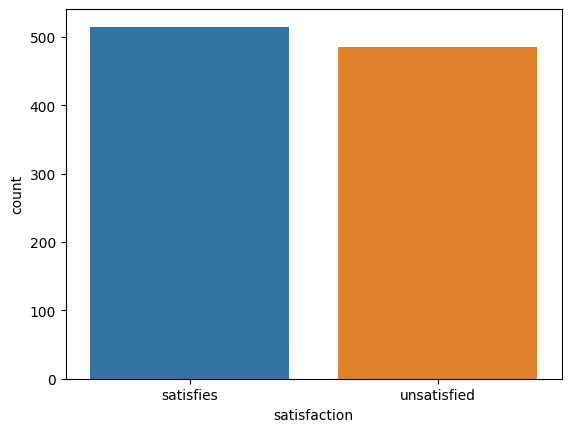

In [30]:
#data vizulization
sns.countplot(data=df, x='satisfaction')

<Axes: xlabel='satisfaction', ylabel='count'>

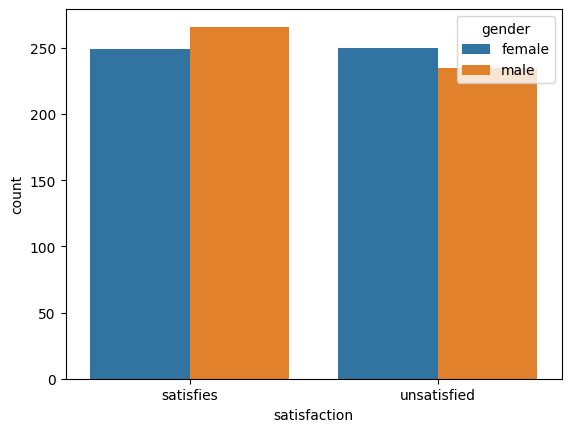

In [31]:
sns.countplot(data=df, x='satisfaction', hue='gender')

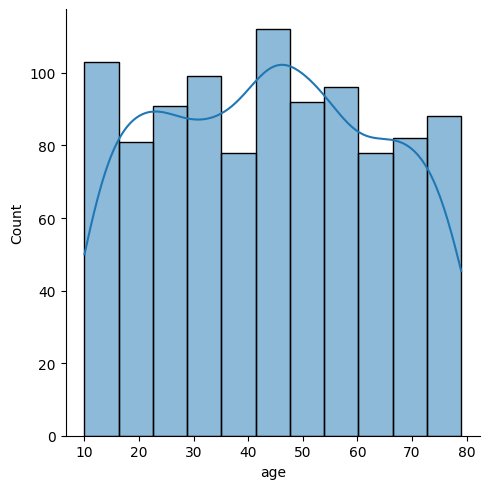

In [32]:
sns.displot(df['age'],kde=True)

<Axes: xlabel='class', ylabel='count'>

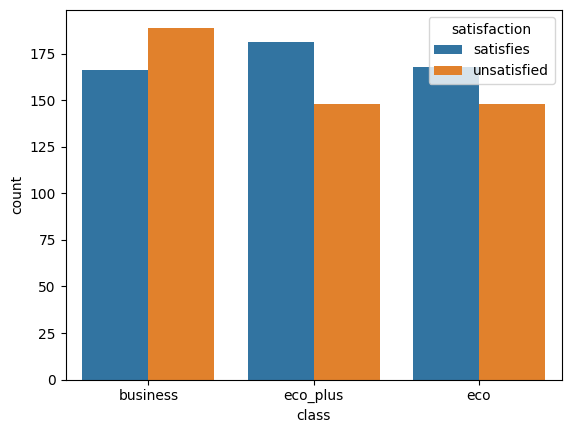

In [33]:
sns.countplot(x='class',data=df,hue='satisfaction')

<Axes: xlabel='customer', ylabel='count'>

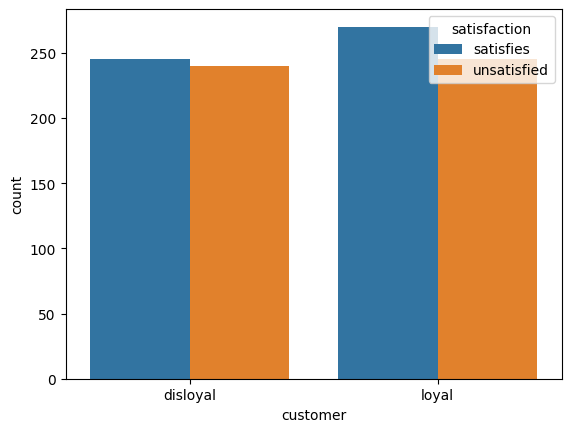

In [ ]:
#hue=dastebandi
sns.countplot(data=df, x='customer', hue='satisfaction')

<Axes: xlabel='wifi', ylabel='count'>

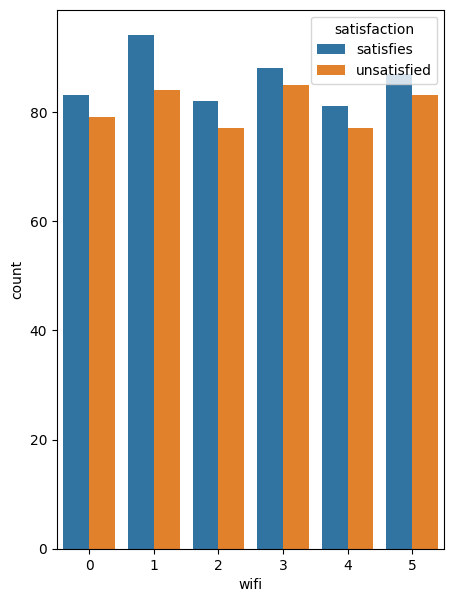

In [38]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, x='wifi', hue='satisfaction')

In [46]:
def convert_sat(item):
    if item=='satisfies':
        return 1
    else:
        return 0
    
df['new_sat']= df['satisfaction'].apply(convert_sat)

In [47]:
df.head(3)

,satisfaction,gender,class,customer,age,wifi,new_sat
0,satisfies,female,business,disloyal,36,1,1
1,satisfies,male,eco_plus,disloyal,45,0,1
2,unsatisfied,female,business,loyal,12,5,0


In [48]:
df[['satisfaction','new_sat']]

,satisfaction,new_sat
0,satisfies,1
1,satisfies,1
2,unsatisfied,0
3,satisfies,1
4,unsatisfied,0
...,...,...
995,satisfies,1
996,satisfies,1
997,unsatisfied,0
998,unsatisfied,0


In [49]:
from sklearn import preprocessing

In [52]:
mypreprocessing=preprocessing.LabelEncoder()
satis=mypreprocessing.fit_transform(list(df['satisfaction']))

In [54]:
df['sat']=satis
df.head(3)

,satisfaction,gender,class,customer,age,wifi,new_sat,sat
0,satisfies,female,business,disloyal,36,1,1,0
1,satisfies,male,eco_plus,disloyal,45,0,1,0
2,unsatisfied,female,business,loyal,12,5,0,1


In [55]:
df.drop('satisfaction', axis=1, inplace=True)

In [76]:
df['gender_encoded'] = mypreprocessing.fit_transform(df['gender'])
df['customer_encoded'] = mypreprocessing.fit_transform(df['customer'])
df['class_encoded'] = mypreprocessing.fit_transform(df['class'])
df.head(4)

,gender,class,customer,age,wifi,new_sat,sat,gender_encoded,customer_encoded,class_encoded
0,female,business,disloyal,36,1,1,0,0,0,0
1,male,eco_plus,disloyal,45,0,1,0,1,0,2
2,female,business,loyal,12,5,0,1,0,1,0
3,female,business,loyal,69,5,1,0,0,1,0


In [78]:
df.drop(['gender', 'class', 'customer'], axis=1, inplace=True)

In [79]:
df.head()

,age,wifi,new_sat,sat,gender_encoded,customer_encoded,class_encoded
0,36,1,1,0,0,0,0
1,45,0,1,0,1,0,2
2,12,5,0,1,0,1,0
3,69,5,1,0,0,1,0
4,78,5,0,1,1,1,2


In [82]:
df=df.dropna()

In [84]:
df.columns

Index(['age', 'wifi', 'new_sat', 'sat', 'gender_encoded', 'customer_encoded',
       'class_encoded'],
      dtype='object')

In [99]:
X=df.drop(columns='new_sat')
y=df['new_sat']

In [104]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 1000
Length of y: 1000


In [105]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=124)

<IPython.core.display.Javascript object>

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
mymodel=LogisticRegression()


In [108]:
mymodel.fit(X_train, y_train)

LogisticRegression()

In [110]:
acc=mymodel.score(X_test, y_test)
acc

1.0

In [114]:
pred=mymodel.predict(X_test)

In [116]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[101   0]
 [  0  99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

